In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import scipy.stats as stats
import statsmodels.formula.api as smf
import thinkstats2
import thinkplot
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
%matplotlib inline

## Import the NFL Combine Data from years 1987 to 2020

In [2]:
# Import the file, create the dataframe, and view the dataframe info
df_1987_to_2020 = pd.read_excel(r'C:\Users\dlbry\Downloads\ThinkStats2-master\code\NFL Combine Data.xlsx')
df_1987_to_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906 entries, 0 to 10905
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             10906 non-null  int64  
 1   Name             10906 non-null  object 
 2   College          10906 non-null  object 
 3   POS              10906 non-null  object 
 4   Height (in)      10906 non-null  float64
 5   Weight (lbs)     10906 non-null  int64  
 6   Hand Size (in)   9231 non-null   float64
 7   Arm Length (in)  8913 non-null   float64
 8   Wonderlic        431 non-null    float64
 9   40 Yard          9828 non-null   float64
 10  Bench Press      7457 non-null   float64
 11  Vert Leap (in)   8780 non-null   float64
 12  Broad Jump (in)  8617 non-null   float64
 13  Shuttle          7711 non-null   float64
 14  3Cone            5028 non-null   float64
 15  60Yd Shuttle     3245 non-null   float64
dtypes: float64(11), int64(2), object(3)
memory usage: 1.3+ MB


We will rename the columns to remove spaces.

In [3]:
df_1987_to_2020.columns = ['Year', 'Name', 'College', 'POS', 'Height', 'Weight',
       'Hand_Size', 'Arm_Length', 'Wonderlic', 'Forty_Yard',
       'Bench_Press', 'Vert_Leap', 'Broad_Jump', 'Shuttle', '3Cone', '60Yd_Shuttle']

We will delete the Wonderlic variable since it is not an athletic measurment.  
We will delete the 3Cone and 60Yd_Shuttle variables due to low participation and similarity to the Shuttle.  
We will delete the  College, Hand_Size, and Arm_length variables as we will not be using them in our analysis.

In [4]:
df_1987_to_2020.drop(['College', 'Hand_Size', 'Arm_Length','Wonderlic', '3Cone','60Yd_Shuttle']
                     , axis=1, inplace=True)

Now that we have narrowed down our variable list, we will define what each variable represents.
### Variable descriptions

•	Height – Measure of player height in inches.  
•	Weight - Measure of player weight in pounds.  
•	40-yard dash – Measure of the time elapsed for the player to run 40 yards.   
•	Bench press - Measure of the number of repetitions the player performed using 225 lb.   
•	Vertical jump – Measure of how high the player jumped.   
•	Broad jump – Measure of how far the player jumped horizontally from a standstill.   
•	Shuttle – Measure of acceleration, lateral quickness, and short-area explosiveness.   
•	Year – The year the measurements were taken at the NFL Combine.

Now that we have our variables defined, we can take a look at the summary statistics.

In [5]:
df_1987_to_2020.describe()

,Year,Height,Weight,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle
count,10906.000000,10906.000000,10906.000000,9828.000000,7457.000000,8780.000000,8617.000000,7711.000000
mean,2003.682193,73.763604,240.211810,4.823333,19.827008,32.113440,112.735291,4.404435
std,10.085587,2.634728,44.933631,0.308427,6.497181,4.210654,9.364555,0.267494
min,1987.000000,64.900000,142.000000,4.210000,1.000000,17.500000,7.000000,3.730000
25%,1994.000000,71.900000,203.000000,4.580000,15.000000,29.000000,107.000000,4.200000
50%,2004.000000,74.000000,232.000000,4.750000,20.000000,32.500000,114.000000,4.370000
75%,2013.000000,75.800000,275.000000,5.030000,24.000000,35.000000,119.000000,4.570000
max,2020.000000,82.400000,387.000000,6.120000,51.000000,46.000000,147.000000,5.680000


From the summary statistics above, we can see some extreme outliers in the Bench Press and Broad Jump. We will investigate these outliers shortly, but first we plot histograms of each of the variables.  

## Histograms of the variables

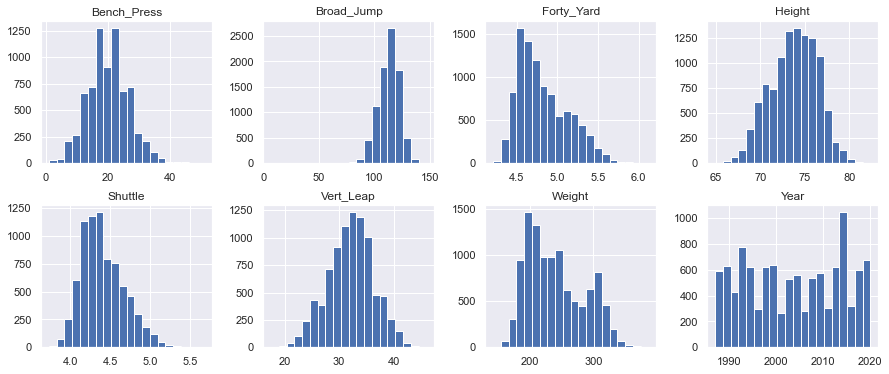

In [6]:
sns.set()
df_1987_to_2020.hist(bins=20, layout=(2,4), figsize=(15,6))
plt.show()

 **Interpreting the Histograms** - We can see from the histograms that the Bench_Press, Broad_Jump, Vertical_Leap, and Height variables are approximately bell-shaped, with the Broad_Jump variable having a tail that extends further left than right. The Forty_Yard, Shuttle, and Weight variables have tails that extend farther to the right than to the left. While the Broad_Jump variable has a tight spread clustered close to the mean, the other variables have a larger spread away from the mean. The Bench_Press appears to be bimodal. The Year variable is simply a count of how many players participated in the combine during a given year.  

Next, we will examine the player position names, with the goal of grouping positions together. We will start by looking at the value counts for each player position.

In [7]:
df_1987_to_2020.POS.value_counts()

WR     1454
CB     1091
RB     1003
OT      816
OLB     813
DE      811
DT      771
TE      635
QB      634
OG      627
ILB     418
FS      407
SS      370
C       328
FB      253
LB       92
P        86
K        71
OL       62
S        55
DL       50
EDG      22
G        19
LS       13
DB        4
NT        1
Name: POS, dtype: int64

We will drop the Long Snapper (LS), Punter (P), and Kicker (K) positions since they are special teams players with limited participation in the NFL combine drills. Some positions have multiple names, and so we will combine those positions together. These changes will reduce the position counts from 26 down to 15.  
We will consolidate the player positions with the following changes: 

Nose Tackle (NT) --> Defensive Tackle (DT), Defensive back (DB) --> Cornerback (CB), Guard (G) --> Offensive Guard (OG), Edge rusher (EDG) --> Outside Linebacker (OLB), Defensive Line (DL) --> Defensive Tackle (DT), Safety (S) --> Strong Safety (SS), Offensive Line (OL) --> Offensive Guard (OG), Linebacker (LB) --> Inside Linebacker (ILB).

In [8]:
# Drop the LS, P, and K positions.
indexNames = df_1987_to_2020[ (df_1987_to_2020['POS'] == 'LS') | (df_1987_to_2020['POS'] == 'P') |
                             (df_1987_to_2020['POS'] == 'K') ].index
df_1987_to_2020.drop(indexNames , inplace=True)

In [9]:
# Consolidate position names.
old_values = ['NT','DB','G','EDG','DL','S','OL','LB']
new_values = ['DT','CB','OG','OLB','DT','SS','OG','ILB']

zipped = zip(old_values, new_values)

for i,j in zipped:
    df_1987_to_2020['POS'].replace(to_replace=i, value=j, inplace=True) 

We saw the broad spread of player weights in the histogram. We want to group players of similar-sized positions, as these players are likely to have similar combine drill measurements. We will use a seaborn violin plot to explore the average player weights of each position.

## Visualizing average player weights for each position.

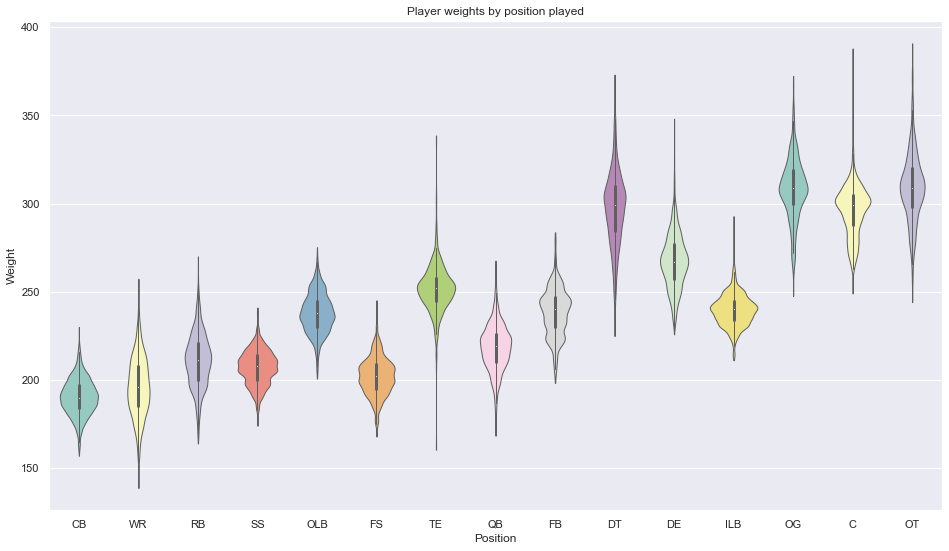

In [10]:
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='POS',y='Weight',data=df_1987_to_2020,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.xlabel("Position")
plt.title('Player weights by position played');

There is a broad range of weights in the plot above, but we can see three natural groupings for the player positions.  

**Group 1: [CB, WR, RB, SS, FS]** - Cornerback, Wide Receiver, Running Back, Strong Safety, and Free Safety.  
The positions are similar sized and they match-up against each other on almost every play.   

**Group 2: [OLB, TE, QB, FB, ILB]** - Outside Linebacker, Tight End, Quarterback, Fullback, and Inside Linebacker.  
This is another grouping of similarly sized players. 

**Group 3: [DT, DE, OG, C, OT]** - Defensive Tackle, Defensive End, Offensive Guard, Center, and Offensive Tackle.  
These are the large lineman that lineup at the line of scrimmage.  

We will be comparing the NFL combine results from 1987-1999 to the results from the years 2000-2020. We will, therefore, need to subset the data frame based on the year 2000.

In [11]:
# Subset the dataframe with combine results prior to the year 2000
df_1987_to_1999 = df_1987_to_2020[(df_1987_to_2020['Year']<2000)]

# Subset the dataframe with combine results after the year 2000
df_2000_to_2020 = df_1987_to_2020[(df_1987_to_2020['Year']>=2000)]

Next, we create a function to subset a dataframe into the three position groupings we identified above.

In [12]:
def MakeFrames(df):
    """Subsets the df into three position groups (WR_RB_DB, Lineman, and LB_FB_TE_QB))

    returns: DataFrames (WR_RB_DB, lineman, and LB_FB_TE_QB)
    
    """
    
    WR_RB_DB = df[(df['POS'] == 'WR') | (df['POS'] == 'CB') | (df['POS']=='SS') | (df['POS'] == 'FS')
        | (df['POS'] == 'RB')]
    
    lineman = df[(df['POS'] == 'OT') | (df['POS'] == 'OG') | (df['POS'] == 'DT') | (df['POS'] == 'DE') |
                 (df['POS'] == 'C')]
    
    LB_FB_TE_QB = df[(df['POS'] == 'TE') | (df['POS'] == 'FB') | (df['POS']=='OLB') | (df['POS'] == 'ILB')
          | (df['POS'] == 'QB')]

    return WR_RB_DB, lineman, LB_FB_TE_QB,

Using the MakeFrames function, we will subset the original dataframe, the post year 2000 dataframe, and the pre-year 2000 dataframe for each position group.

In [13]:
# Create dataframes based on position groupings for the years 1987 to 2020
WR_RB_DB_1987_to_2020, lineman_1987_to_2020, LB_FB_TE_QB_1987_to_2020 = MakeFrames(df_1987_to_2020)

# Create dataframes based on position groupings for the years 2000 to 2020
WR_RB_DB_2000_to_2020, lineman_2000_to_2020, LB_FB_TE_QB_2000_to_2020 = MakeFrames(df_2000_to_2020)

# Create dataframes based on position groupings for the years 1987 to 1999
WR_RB_DB_1987_to_1999, lineman_1987_to_1999, LB_FB_TE_QB_1987_to_1999 = MakeFrames(df_1987_to_1999)

## Outliers. ##
Now that we have the dataframes subsetted, we will check for outliers for each position-grouped dataframe from 1987-2020.  We will do this by iterating over the list of variables (metrics) for each position group dataframe. We will check for outliers that are less than the mean minus 3 times the standard deviation or greater than the mean plus 3 times the standard deviation. All outliers will be stored in a dataframe called outlier_df.

In [14]:
# Initialize an empty list to store the outlier dataframes
mylist1 =[]

# Create list of position group dataframes to check for outliers
list_of_df = [WR_RB_DB_1987_to_2020,lineman_1987_to_2020,LB_FB_TE_QB_1987_to_2020]

# Create list of metrics within each dataframe to check for outliers
metric_list = ['Height','Weight','Bench_Press','Forty_Yard','Vert_Leap','Broad_Jump','Shuttle']

# For each dataframe, iterate through each metric to check for outliers
# that are less than the mean minus 3 times the standard deviation or
# greater than the mean plus 3 times the standard deviation.
for dataframe in list_of_df:
    for metric in metric_list:
        
        # Calculate the mean and standard deviation for each metric
        mean = dataframe[metric].mean()
        sd = dataframe[metric].std()
        
        # Create df1 containing the outliers for the given metric
        df1 = dataframe[(dataframe[metric] < (mean - 3*sd)) | (dataframe[metric] > (mean + 3*sd))]
        
        # Append the outlier df1 to the list
        mylist1.append(df1)

# Create the outlier dataframe from the list of individual outlier dataframes
outlier_df = mylist1[0]

# Concatenate all of the outlier dataframes together to create the complete outlier_df
for i in range(len(mylist1)-1):
    outlier_df = pd.concat([outlier_df, mylist1[i+1]])
    


In [15]:
# Change the display option to display all of the rows in the outlier_df.
pd.set_option('display.max_rows', outlier_df.shape[0]+1)

# Drop the duplicate rows containing players that have multiple metric outliers
outlier_df = pd.DataFrame.drop_duplicates(outlier_df)
outlier_df.sort_values(by='Year',axis=0, ascending=False)


,Year,Name,POS,Height,Weight,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle
10801,2020,Mekhi Becton,OG,79.000,369,5.10,23.0,NaN,NaN,NaN
10866,2020,Collin Johnson,WR,78.000,220,NaN,17.0,NaN,NaN,NaN
10639,2020,A.J. Dillon,RB,72.000,250,4.53,23.0,41.0,131.0,NaN
10615,2020,Donovan Peoples-Jones,WR,74.000,208,4.48,NaN,44.5,139.0,NaN
10891,2020,Netane Muti,OG,75.000,307,NaN,44.0,NaN,NaN,NaN
10604,2020,Willie Gay,ILB,74.000,240,4.46,21.0,39.5,136.0,4.30
10598,2020,Jeremy Chinn,SS,75.000,219,4.45,20.0,41.0,138.0,NaN
10768,2020,Nick Coe,ILB,77.000,291,4.89,21.0,29.0,116.0,NaN
10605,2020,Jalen Reagor,WR,71.000,195,4.47,17.0,42.0,138.0,4.46
10800,2020,Alex Taylor,OG,81.000,310,5.09,21.0,25.0,116.0,4.79


The outliers were cross-validated on https://www.pro-football-reference.com, https://www.nfl.com, https://www.wikipedia.com, and https://www.google.com for accuracy. Some of the outliers are due to the extreme differences in player sizes regardless of the time period. Other outliers can be attributed to the evolution of player size, speed, and strength over time (https://operations.nfl.com/the-players/evolution-of-the-nfl-player/).
After validation, the following data collection errors were found:

Tyler Orlosky (index 9938) did not perform the Shuttle  (should be nan).  
Taj Smith (index 6612) did not perform the bench press (should be nan).     
Limas Sweed (index 6575) did not perform the bench press (should be nan).  
Brandon Williams (index 6000) did not perform the bench press (should be nan).    
Gerald Sensabaugh (index 5705) had a broad jump of 133 (listed as 113).  
Mario Edwards (index 4356) did not perform the bench press (should be nan).  
Kevin Mawae (index 2653) should have weight 289 (listed as 385).  
Jason Odom (index 3206) broad jump recorded as 8 (should be nan).  
Reggie Green (index 3268) broad jump recorded as 7 (should be nan).  
Nick Perry FS (index 8847) did not perform the bench press, broad jump, or vert leap (should be nan)

We will update these values in the original df_1987_to_2020 dataframe.

In [16]:
# Tyler Orlosky (index 9938) did not perform the Shuttle (should be nan).
df_1987_to_2020.at[9938,'Shuttle'] = np.nan
# Taj Smith (index 6612) did not perform the bench press (should be nan).
df_1987_to_2020.at[6612,'Bench_Press'] = np.nan
# Limas Sweed (index 6575) did not perform the bench press (should be nan).
df_1987_to_2020.at[6575,'Bench_Press'] = np.nan
# Brandon Williams (index 6000) did not perform the bench press (should be nan).
df_1987_to_2020.at[6000,'Bench_Press'] = np.nan
# Gerald Sensabaugh (index 5705) had a broad jump of 133 (listed as 113).
df_1987_to_2020.at[5705,'Broad_Jump'] = 133
# Mario Edwards (index 4356) did not perform the bench press (should be nan).
df_1987_to_2020.at[4356,'Bench_Press'] = np.nan
# Kevin Mawae (index 2653) should have weight 289 (listed as 385).
df_1987_to_2020.at[2653,'Weight'] = 289
# Jason Odom (index 3206) broad jump recorded as 8 (should be nan).
df_1987_to_2020.at[3206,'Broad_Jump'] = np.nan
# Reggie Green (index 3268) broad jump recorded as 7 (should be nan).
df_1987_to_2020.at[3268,'Broad_Jump'] = np.nan
# Nick Perry FS (index 8847) did not attend the combine and should be deleted.
df_1987_to_2020.at[8847,'Broad_Jump'] = np.nan
df_1987_to_2020.at[8847,'Bench_Press'] = np.nan
df_1987_to_2020.at[8847,'Vert_Leap'] = np.nan



We have updated the values in the original dataframe df_1987_to_2020, so we must re-filter and re-subset the dataframes again so that the changes will carry over to the subsetted dataframes.

In [17]:
# Subset Combine results prior to the year 2000
df_1987_to_1999 = df_1987_to_2020[(df_1987_to_2020['Year']<2000)]

# Subset Combine results after the year 2000
df_2000_to_2020 = df_1987_to_2020[(df_1987_to_2020['Year']>=2000)]

# Create dataframes based on position groupings for the years 1987 to 2020
WR_RB_DB_1987_to_2020, lineman_1987_to_2020, LB_FB_TE_QB_1987_to_2020 = MakeFrames(df_1987_to_2020)

# Create dataframes based on position groupings for the years 2000 to 2020
WR_RB_DB_2000_to_2020, lineman_2000_to_2020, LB_FB_TE_QB_2000_to_2020 = MakeFrames(df_2000_to_2020)

# Create dataframes based on position groupings for the years 1987 to 1999
WR_RB_DB_1987_to_1999, lineman_1987_to_1999, LB_FB_TE_QB_1987_to_1999= MakeFrames(df_1987_to_1999)

We have the two time periods (1987-1999) and (2000-2020), and we want to calculate the percentage change between the two time periods for each measured variable (metric). We first calculate the average of each metric for each position by using the combine results from the years 1987 to 1999 (old_average). Next, we calculate the average of each metric for each position by using the combine results from the years 2000 to 2020 (new_average). Finally, we calculate the percentage change by subtracting the old_average from the new_average and then dividing by the old_average. We will store the results as a list of lists, and from this list, we will create a dataframe. We will then visualize the changes using seaborn bar plots.

In [18]:
mylist=[]
for i in df_1987_to_2020.POS.unique():
    for metric in ['Height', 'Weight','Bench_Press','Forty_Yard','Vert_Leap','Broad_Jump','Shuttle']:
        old_average = df_1987_to_1999[df_1987_to_1999['POS']==i][metric].mean()
        new_average = df_2000_to_2020[df_2000_to_2020['POS']==i][metric].mean()
        diff = (new_average - old_average)/old_average
        mylist.append([i,metric, 100*diff])

# Create a dataframe containing the percentage changes for all metrics
mydf = pd.DataFrame(mylist, columns = ['POS','Metric','Value'])        

## Visualizing how much bigger, faster, and stronger players have become. ##

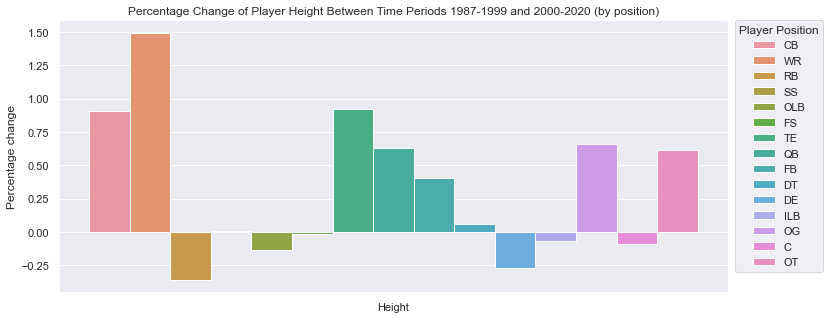

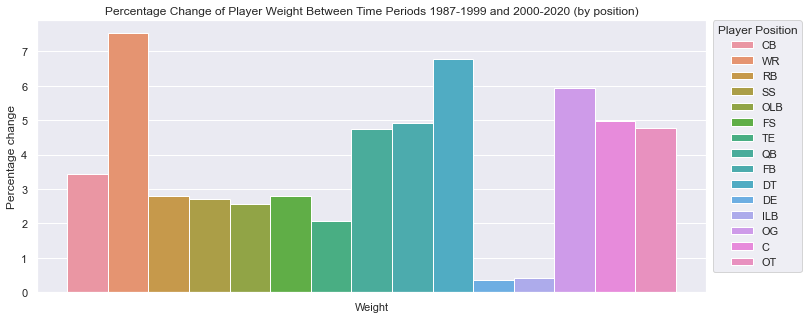

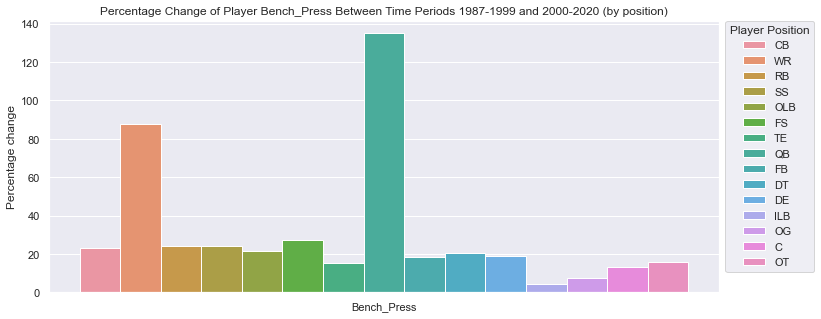

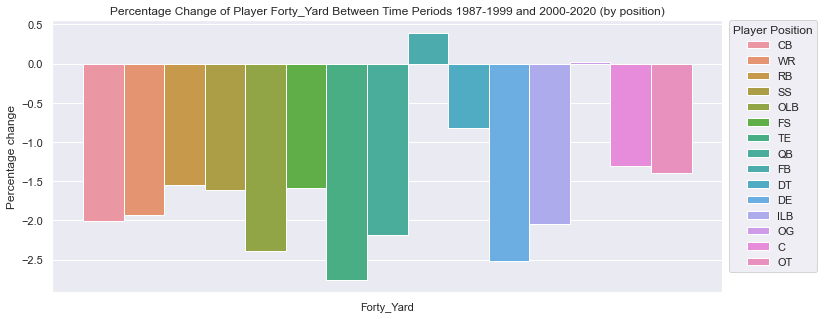

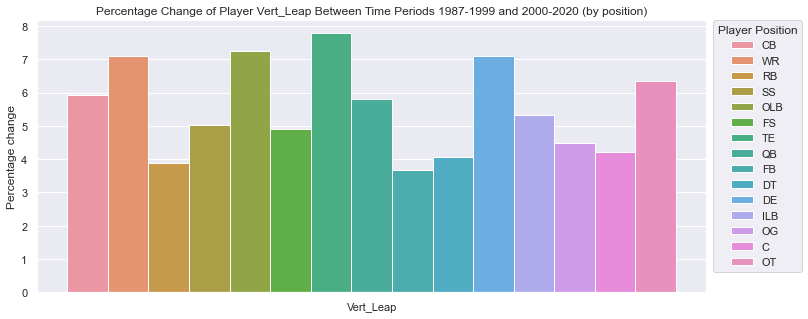

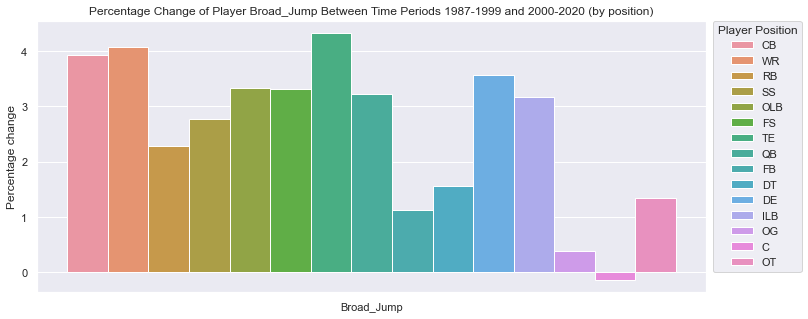

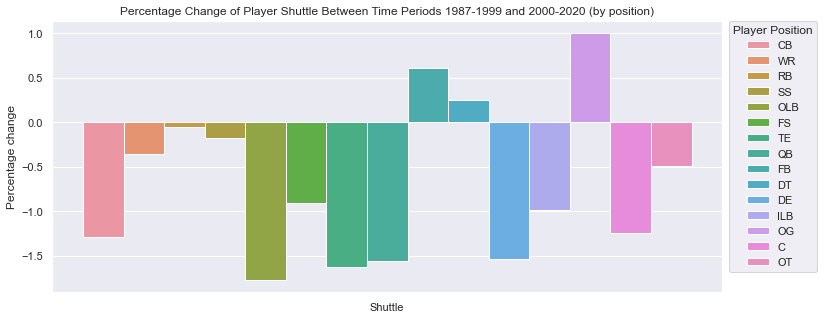

In [19]:
sns.set(rc={'figure.figsize':(12,5)})
for metric in mydf.Metric.unique():
    ax = sns.barplot(x='Metric', y='Value', hue='POS', data=mydf[mydf['Metric']==metric])
    ax.set_title("Percentage Change of Player " + metric + ' Between Time Periods 1987-1999 and 2000-2020 (by position)')
    ax.set_ylabel('Percentage change')
    ax.set_xlabel('')    
    ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.).set_title('Player Position')
    plt.show()

From the bar plots, we see the following notable results:  

**~20% increase** in the Bench_Press variable across almost all positions.    
**~5% increase** in the Vert_Leap variable across most positions.  
**~3% increase** in the Broad_Jump variable across most positions.  
**~3% increase** in the Weight variable across almost all positions.  
**~1.5% decrease** in the Forty_Yard variable across most positions.  
**~1% decrease** in the Shuttle variable across most positions.

Interestingly, the Tight End (TE) position had the largest percentage change for the Broad_Jump, Vert_Leap, and Forty_Yard. Additionally, Tight Ends had the second-largest percentage change in Height (behind Wide Receivers), and Shuttle time (behind Outside Linebackers). These changes could be due to how the Tight End position has evolved from a primary role of blocking to a new role as a larger version of a Wide Receiver.

We also observed an incredible 85% increase in Bench_Press for the WR position and a 135% increase for the QB position. To understand why we will investigate the descriptive statistics of the WR and QB position from the pre-year 2000 and post year 2000 dataframes.

In [20]:
# Select the WR and QB positions for the pre year 2000 dataframe.
conditions = (df_1987_to_1999['POS']=='WR') | (df_1987_to_1999['POS']=='QB')

# Select the WR and QB positions for the post year 2000 dataframe.
conditions2 = (df_2000_to_2020['POS']=='WR') | (df_2000_to_2020['POS']=='QB')

# Print the descriptive statistics for the WR and QB positions for the two time periods.
df_1987_to_1999[conditions].describe(), df_2000_to_2020[conditions2].describe()

(              Year      Height      Weight  Forty_Yard  Bench_Press  \
 count   831.000000  831.000000  831.000000  701.000000    94.000000   
 mean   1992.878460   72.520818  194.885680    4.703509     7.904255   
 std       3.665325    2.359842   18.629816    0.202712     3.959660   
 min    1987.000000   66.000000  142.000000    4.240000     1.000000   
 25%    1990.000000   70.900000  182.000000    4.560000     5.000000   
 50%    1992.000000   72.600000  194.000000    4.660000     8.000000   
 75%    1996.000000   74.300000  208.000000    4.820000    10.000000   
 max    1999.000000   79.900000  261.000000    5.360000    17.000000   
 
         Vert_Leap  Broad_Jump     Shuttle  
 count  692.000000  694.000000  641.000000  
 mean    31.998266  113.350144    4.286708  
 std      3.386988    7.315199    0.177651  
 min     22.000000   90.000000    3.800000  
 25%     30.000000  108.250000    4.160000  
 50%     32.000000  114.000000    4.290000  
 75%     34.500000  118.000000    4

From the summary statistics, we can see that during the years 1987 to 1999, only 94 out of 831 Wide Receivers(WR) and Quarterbacks(QB) participated in the bench press drill. This 11.3% participation rate is the lowest among all of the drills for these positions. One reason might be that during the early years of the NFL Combine, the Bench Press was not considered an important drill for a WR or QB to perform. The participation rate jumps up to 36.8% during the years 2000 to 2020, as NFL scouts started to place a premium on strong Wide Receivers.

The Bench_Press variable has increased significantly across all positions. To verify the change visually, we will plot a Probability Mass Function (PMF).

## PMF of the Bench_Press variable comparing two different time periods (1987-1999) versus (2000-2020). ##

In [21]:
# Select the Bench_Press variable for 1987-1999 and drop na values.
bench_1987_to_1999 = df_1987_to_1999.Bench_Press
bench_1987_to_1999_dropna = bench_1987_to_1999.dropna()

# Select the Bench_Press variable for 2000-2020 and drop na values.
bench_2000_to_2020 = df_2000_to_2020.Bench_Press
bench_2000_to_2020_dropna = bench_2000_to_2020.dropna()

first_pmf = thinkstats2.Pmf(bench_1987_to_1999_dropna, label='1987 to 1999')
other_pmf = thinkstats2.Pmf(bench_2000_to_2020_dropna, label='2000 to 2020')

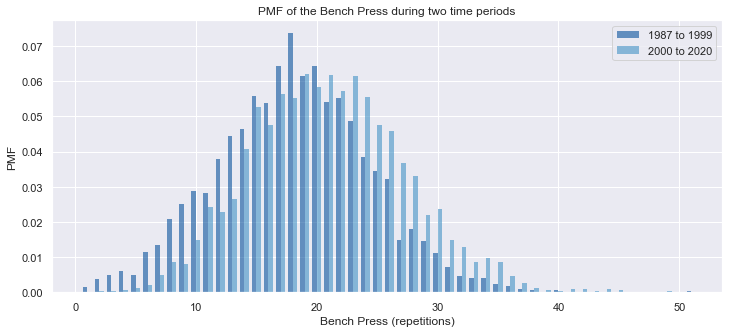

In [22]:
# Use the .Hist() function from the thinkplot library to plot the PMF
width = 3 / 8

thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(title='PMF of the Bench Press during two time periods',
                 xlabel='Bench Press (repetitions)', ylabel='PMF')

From the PMF, we can see that the 1987-1999 group had a higher percentage of players performing fewer reps. As the repetitions increase past 20, the pattern flips. We then see that the 2000-2020 group had a higher percentage of players performing higher reps, which aligns with the 20% observed increase in the bench press variable across most position groups. We also observed a 3% to 5% increase in average weight across most position groups. We will plot a Cumulative Distribution Function (CDF) to investigate this further.
## CDFs of Player Weights during two time periods. ##

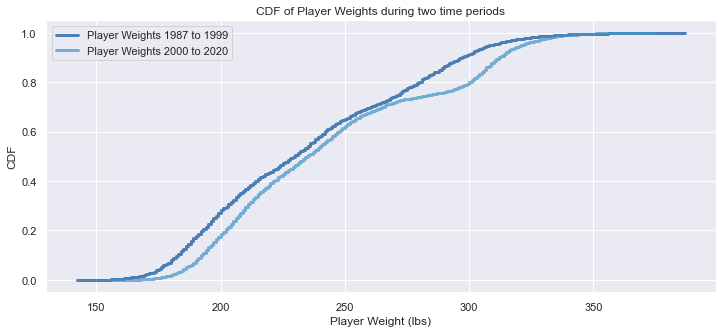

In [23]:
# Select the Weight variable for 1987-1999
first_weight_cdf = thinkstats2.Cdf(df_1987_to_1999.Weight, label='Player Weights 1987 to 1999')

# Select the Weight variable for 2000-2020
other_weight_cdf = cdf = thinkstats2.Cdf(df_2000_to_2020.Weight, label='Player Weights 2000 to 2020')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_weight_cdf, other_weight_cdf])
thinkplot.Config(title='CDF of Player Weights during two time periods',xlabel='Player Weight (lbs)', ylabel='CDF')

In the above CDFs, it is clear that players from 1987-1999 are lighter than players from 2000-2020 throughout the distribution. There is a large gap observed at the 300 lb. weight, which indicates approximately 90% of players from time 1987-1999 weighed less than or equal to 300 pounds. Meanwhile, only 80% of players from 2000-2020 weighed less than or equal to 300 lbs. 

In addition to observing modern players being bigger (Weight) and stronger(Bench_Press), we observed a 1.5% decrease in forty yard dash times. We will plot a CDF to investigate this further.

## CDFs of Forty Yard dash times during two time periods

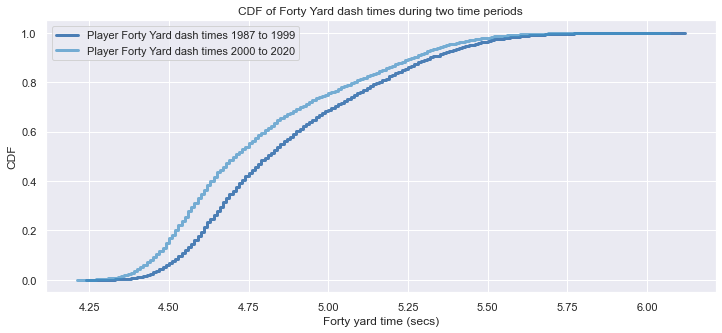

In [24]:
# Select the Forty_Yard variable for 1987-1999
first_forty_cdf = thinkstats2.Cdf(df_1987_to_1999.Forty_Yard, label='Player Forty Yard dash times 1987 to 1999')

# Select the Forty_Yard variable for 2000-2020
other_forty_cdf = thinkstats2.Cdf(df_2000_to_2020.Forty_Yard, label='Player Forty Yard dash times 2000 to 2020')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_forty_cdf, other_forty_cdf])
thinkplot.Config(title='CDF of Forty Yard dash times during two time periods',xlabel='Forty yard time (secs)', ylabel='CDF')

In the above CDFs, it is clear that players from 2000-2020 are faster than players from 1987-1999 throughout the distribution. There is a significant gap observed between 4.5 seconds and 4.75 seconds, and the maximum gap appears at around 4.65 seconds. We can calculate and compare the percentages using the .Prob() method.

In [25]:
# Use .Prob() to calculate the % of players that ran the forty yard dash in 4.65 or less during each time period.

first_forty_pct = round(first_forty_cdf.Prob(4.65)*100,1)
other_forty_pct = round(other_forty_cdf.Prob(4.65)*100,1)

print(str(first_forty_pct)+'% of players from 1987-1999 ran the forty yard dash in 4.65 seconds or less')
print(str(other_forty_pct)+'% of players from 2000-2020 ran the forty yard dash in 4.65 seconds or less')

27.8% of players from 1987-1999 ran the forty yard dash in 4.65 seconds or less
43.7% of players from 2000-2020 ran the forty yard dash in 4.65 seconds or less


Next, we will test whether a normal distribution is a good model for player heights. To do this, we will use the .probplot() function from the statsmodels library.     
## Normal probability plot of the player Height variable.

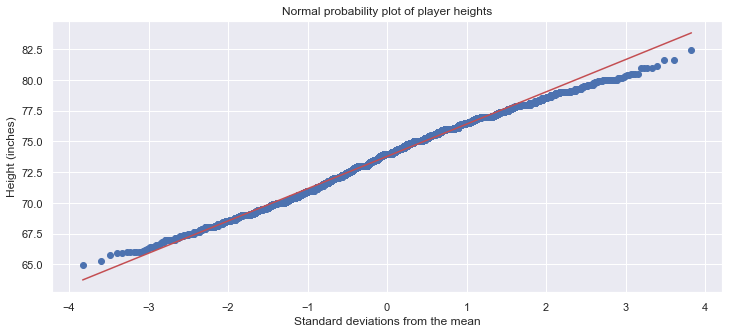

In [26]:
sns.set(rc={'figure.figsize':(12,5)})
stats.probplot(df_1987_to_2020.Height, dist="norm", plot=plt)
plt.xlabel('Standard deviations from the mean')
plt.ylabel('Height (inches)')
plt.title('Normal probability plot of player heights')
plt.show()

Looking at the probability plot, we can see that the curve matches the normal distribution model from -3 standard deviations up to almost +2 standard deviations before deviating at both tails. We can, therefore, conclude that a normal distribution is a good model for the height variable.  

Next, we will look at how Forty Yard Dash times are related to player weight by plotting a scatterplot.
## Scatterplot of Forty Yard Dash times vs. Weight.

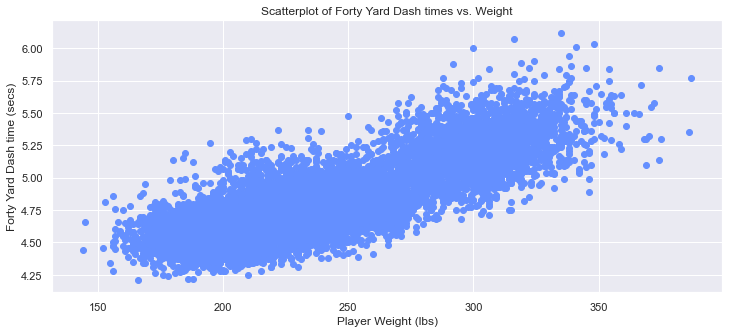

In [27]:
# Create a scatterplot of Player Forty_Yard times vs. Weight
plt.scatter(df_1987_to_2020.Weight , df_1987_to_2020.Forty_Yard, color='#648FFF')
plt.xlabel('Player Weight (lbs)')
plt.ylabel('Forty Yard Dash time (secs)')
plt.title('Scatterplot of Forty Yard Dash times vs. Weight');

From the above plot, we can see that Weight and Forty Yard dash times appear to have a strong positive linear relationship. If we think about causation, it is clear that slower Forty Yard dash times do not cause players to be larger. However, from Newton's second law of motion: Force = Mass*Acceleration, we can see that an increase in Mass(player weight) causes a decrease in acceleration, assuming the Force remains the same. Since acceleration is a critical component of the Forty Yard dash, we can say that larger weights cause slower times. We will see later that Weight is strongly correlated to all of the metrics measured at the NFL combine.

Next, we will look at how Broad Jump distances are related to Vertical Leap measurements by plotting a scatterplot.
## Scatterplot of Vertical Leap height vs. Broad Jump distance.

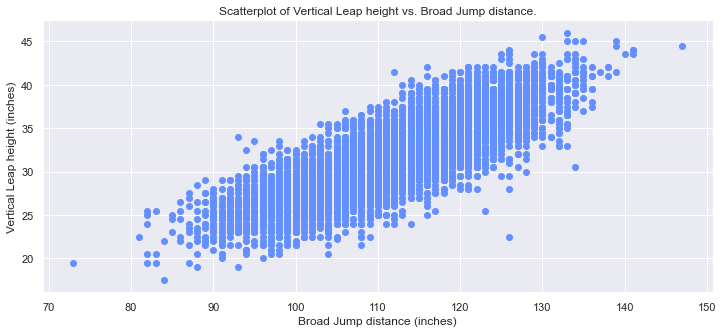

In [28]:
# Create a scatterplot of Vertical Leap height vs. Broad Jump distance.
plt.scatter(df_1987_to_2020.Broad_Jump , df_1987_to_2020.Vert_Leap, color='#648FFF')
plt.xlabel('Broad Jump distance (inches)')
plt.ylabel('Vertical Leap height (inches)')
plt.title('Scatterplot of Vertical Leap height vs. Broad Jump distance.');

From the above plot, we can see that Vertical Leap height and Broad Jump distance appear to have a strong positive linear relationship. We cannot determine causation in this case, however. Since fast-twitch muscle fibers are needed for explosive jumping, it is likely that fast-twitch muscle fiber density influences jumping ability (vertically and horizontally).

We have plotted two scatterplots, and we have seen a strong correlation between the variables in both plots. Now we will construct the correlation matrix to see all of the correlations between variables.

## Correlation Matrix

In [29]:
corr = df_1987_to_2020.corr()

corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Year,Height,Weight,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle
Year,1.00,0.06,0.09,-0.14,0.18,0.20,0.23,-0.03
Height,0.06,1.00,0.73,0.62,0.37,-0.41,-0.41,0.53
Weight,0.09,0.73,1.00,0.83,0.63,-0.58,-0.64,0.73
Forty_Yard,-0.14,0.62,0.83,1.00,0.41,-0.75,-0.80,0.77
Bench_Press,0.18,0.37,0.63,0.41,1.00,-0.24,-0.30,0.34
Vert_Leap,0.20,-0.41,-0.58,-0.75,-0.24,1.00,0.82,-0.67
Broad_Jump,0.23,-0.41,-0.64,-0.80,-0.30,0.82,1.00,-0.68
Shuttle,-0.03,0.53,0.73,0.77,0.34,-0.67,-0.68,1.00


From the correlation matrix, we can see that Weight is strongly correlated with almost all of the variables, most of which can also explained by Newton's second law. We also see the high correlations between the variables in our scatterplots:  

Forty_Yard and Weight variables have a Pearson r = 0.83.  
Vert_Leap and Broad_Jump have a Pearson r = 0.82.

If we look at the correlations for the Year variable, we can see that metrics correlate in the same positive or negative way as they did in our observed differences. In other words, as the Year gets larger, the players get slightly taller, heavier, stronger, jump higher and farther, and run quicker.

We will run hypothesis tests to see if our observed results of players getting bigger, faster, and stronger are statistically significant. The null hypothesis is that the observed differences in the mean of the metrics between the two time periods happened by chance. To test the null hypothesis, for each metric, we will combine the data for each time period and then randomly shuffle the new data set. We will create two arrays from the new data set that match the size of the two original data sets. We will then create 10,000 random permutations of these concatenated and shuffled arrays, and for each, we will calculate the difference in means between the arrays. The p-value will be calculated as the percentage of the 10,000 arrays that had mean differences greater than or equal to the observed mean difference. The formulas for conducting the hypothesis test were adapted from https://learn.datacamp.com/courses/statistical-thinking-in-python-part-2.

In [30]:
# Hypothesis testing formula
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the two data sets together: return data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array the data from both sets together: return permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two arrays: return perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates. Uses the permutation_sample function."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    
    # Remove nan values 
    data_1 = data_1[~np.isnan(data_1)]
    data_2 = data_2[~np.isnan(data_2)]

    # The difference of means of data_1, data_2: diff
    diff = abs(np.mean(data_1) - np.mean(data_2))

    return diff


In [31]:
for metric in ['Height', 'Weight','Bench_Press','Forty_Yard','Vert_Leap','Broad_Jump','Shuttle']:
    data_1, data_2 = df_1987_to_1999[metric], df_2000_to_2020[metric]
    empirical_diff_means = diff_of_means(data_1, data_2)

    # Draw 10,000 permutation replicates: perm_replicates
    perm_replicates = draw_perm_reps(data_1,data_2,
                                 diff_of_means, size=10000)

    # Compute p-value: p
    # The p-value is the fraction of our simulated data sets for which 
    # the difference in means is at least as extreme as the observed difference in means

    p = np.sum(perm_replicates >= empirical_diff_means)/len(perm_replicates)

    # Print the result
    print('The p-value for the '+metric + ' variable = ', '%0.9f' % p)


The p-value for the Height variable =  0.000000000
The p-value for the Weight variable =  0.000000000
The p-value for the Bench_Press variable =  0.000000000
The p-value for the Forty_Yard variable =  0.000000000
The p-value for the Vert_Leap variable =  0.000000000
The p-value for the Broad_Jump variable =  0.000000000
The p-value for the Shuttle variable =  0.000100000


Based on the p-values being so small, we can reject the null hypothesis and say that our observations of players getting bigger, faster, and stronger were statistically significant. Moreover, the hypothesis tests also allow us to say that our observations that players got taller, jumped higher and farther, and increased lateral quickness are also statistically significant.

Finally, we will run a regression analysis of the Forty_Yard variable as the dependent variable with the Bench_Press and Shuttle variables used as predictors.

In [32]:
import statsmodels.formula.api as smf

formula = 'Forty_Yard ~ Bench_Press + Shuttle'
model = smf.ols(formula, data=df_1987_to_2020)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Forty_Yard   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     4786.
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        00:13:19   Log-Likelihood:                 1244.0
No. Observations:                5644   AIC:                            -2482.
Df Residuals:                    5641   BIC:                            -2462.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9165      0.043     21.331      0.000       0.832       1.001
Bench_Press     0.0076      0.000     18.157      0.000       0.007       0.008
Shuttle         0.8563      0.010     84.249      0.000       0.836       0.876
==============================================================================
Omnibus:                       11.596   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.094
Skew:                           0.084   Prob(JB):                      0.00236
Kurtosis:                       3.152   Cond. No.                         364.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results of the regression analysis shows the following:  

Intercept = 0.9165 - This means that if a player performed zero Bench Press reps and also performed the shuttle in zero seconds, then we would expect the player to run the Forty Yard dash in 0.9165 seconds. While the p-value indicates the result is statistically significant, this scenario is physically impossible. Intercept values are often non-sensical at face value but are useful to make the linear regression equations work.

Bench_Press = 0.0076 - This means that for each Bench Press repetition, there is a corresponding increase of 0.0076 seconds in the Forty Yard dash time. The p-value indicates the result is statistically significant.

Shuttle = 0.8563 - This means that for each Shuttle time increase of one second, there is a corresponding increase of 0.8563 seconds in the Forty Yard dash time. The p-value indicates the result is statistically significant.

R-squared = 0.629 - This means that the Bench_Press and Shuttle variables explain 62.9% of the variation in the Forty_Yard variable.

Prob(F-Statistic) = 0.00 - This means we can reject the null hypothesis that the Bench Press and Shuttle coefficients should be zero.